In [1]:
import numpy as np # linear algebra
import pandas as pd # df processing

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import lightgbm as lgb        

In [2]:
#Dataset uploaded
df = pd.read_excel('Cleaned_Insurance_Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   incident_type       1000 non-null   object
 1   collision_type      822 non-null    object
 2   incident_severity   1000 non-null   object
 3   total_claim_amount  1000 non-null   int64 
 4   injury_claim        1000 non-null   int64 
 5   property_claim      1000 non-null   int64 
 6   vehicle_claim       1000 non-null   int64 
 7   fraud_reported      1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [3]:
#lets do Lable enconding coding to make more features 

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


1 columns were label encoded.


In [4]:
df

,incident_type,collision_type,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Multi-vehicle Collision,Side Collision,Major Damage,64300,6430,6430,51440,1
1,Multi-vehicle Collision,Rear Collision,Total Loss,60190,4630,9260,46300,1
2,Single Vehicle Collision,Front Collision,Total Loss,91520,8320,16640,66560,1
3,Single Vehicle Collision,Rear Collision,Minor Damage,77000,15400,7700,53900,1
4,Multi-vehicle Collision,Rear Collision,Total Loss,98670,15180,15180,68310,1
...,...,...,...,...,...,...,...,...
995,Single Vehicle Collision,Side Collision,Minor Damage,95810,14740,14740,66330,0
996,Single Vehicle Collision,Side Collision,Major Damage,62640,10440,10440,41760,0
997,Single Vehicle Collision,Rear Collision,Minor Damage,61740,6860,6860,48020,0
998,Single Vehicle Collision,Rear Collision,Minor Damage,77880,7080,14160,56640,0


##Data Visualization

<AxesSubplot:>

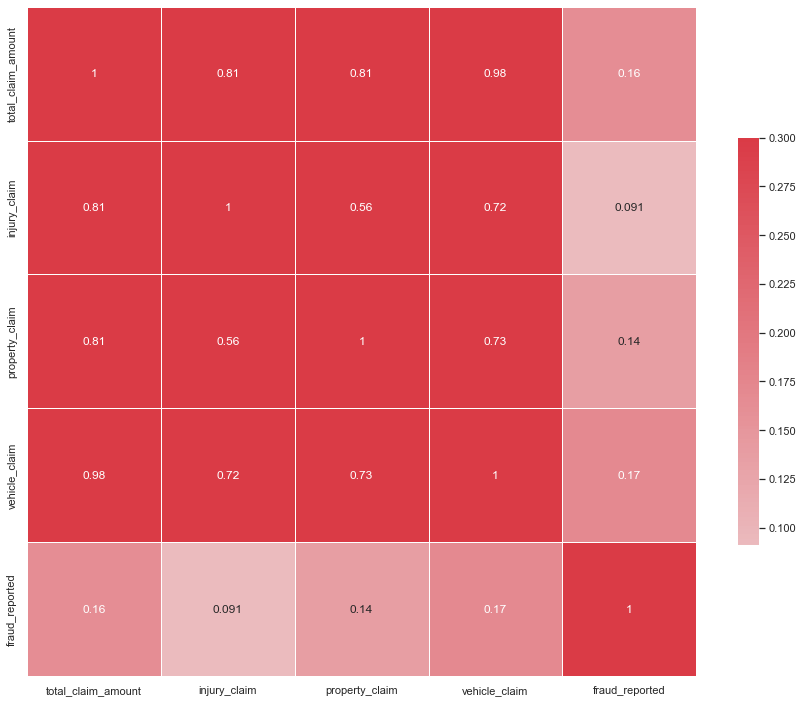

In [5]:
#data = pd.get_dummies(data)
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
print (df.corr())

                    total_claim_amount  injury_claim  property_claim  \
total_claim_amount            1.000000      0.805025        0.810686   
injury_claim                  0.805025      1.000000        0.563866   
property_claim                0.810686      0.563866        1.000000   
vehicle_claim                 0.982773      0.722878        0.732090   
fraud_reported                0.163651      0.090975        0.137835   

                    vehicle_claim  fraud_reported  
total_claim_amount       0.982773        0.163651  
injury_claim             0.722878        0.090975  
property_claim           0.732090        0.137835  
vehicle_claim            1.000000        0.170049  
fraud_reported           0.170049        1.000000  


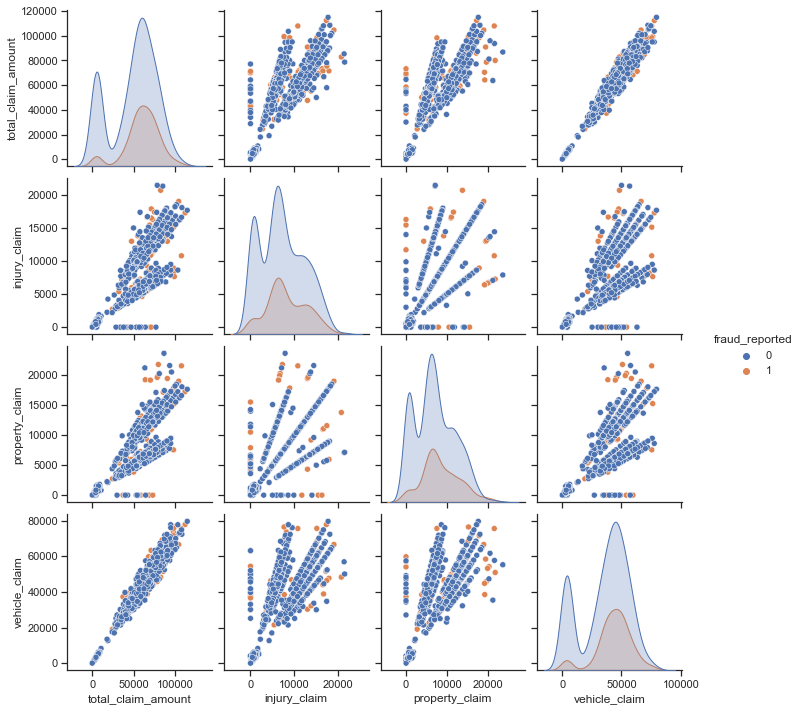

In [7]:
sns.set_theme(style="ticks")

sns.pairplot(df, hue="fraud_reported")

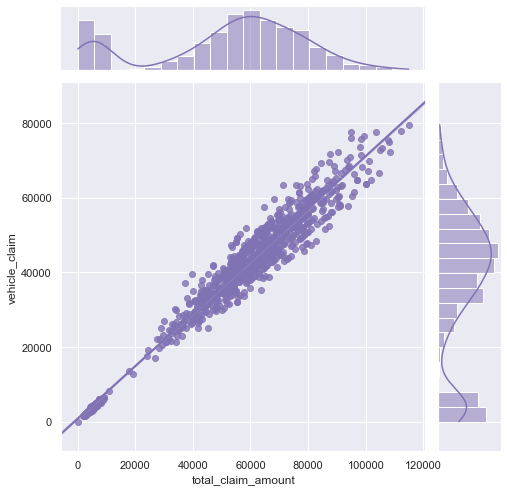

In [8]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="total_claim_amount", y="vehicle_claim", data=df,
                  kind="reg", truncate=False,
                  #xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [9]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
0,incident_type,4
2,incident_severity,4
1,collision_type,3


In [10]:
df

,incident_type,collision_type,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Multi-vehicle Collision,Side Collision,Major Damage,64300,6430,6430,51440,1
1,Multi-vehicle Collision,Rear Collision,Total Loss,60190,4630,9260,46300,1
2,Single Vehicle Collision,Front Collision,Total Loss,91520,8320,16640,66560,1
3,Single Vehicle Collision,Rear Collision,Minor Damage,77000,15400,7700,53900,1
4,Multi-vehicle Collision,Rear Collision,Total Loss,98670,15180,15180,68310,1
...,...,...,...,...,...,...,...,...
995,Single Vehicle Collision,Side Collision,Minor Damage,95810,14740,14740,66330,0
996,Single Vehicle Collision,Side Collision,Major Damage,62640,10440,10440,41760,0
997,Single Vehicle Collision,Rear Collision,Minor Damage,61740,6860,6860,48020,0
998,Single Vehicle Collision,Rear Collision,Minor Damage,77880,7080,14160,56640,0


In [11]:
df['incident_type'].unique()

array(['Multi-vehicle Collision', 'Single Vehicle Collision',
       'Parked Car', 'Vehicle Theft'], dtype=object)

In [12]:
df['incident_severity'].unique()

array(['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
      dtype=object)

In [13]:
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision', nan],
      dtype=object)

###Model

In [14]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 16)


In [15]:
df

,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage
0,64300,6430,6430,51440,1,1,0,0,0,0,0,1,1,0,0,0
1,60190,4630,9260,46300,1,1,0,0,0,0,1,0,0,0,1,0
2,91520,8320,16640,66560,1,0,0,1,0,1,0,0,0,0,1,0
3,77000,15400,7700,53900,1,0,0,1,0,0,1,0,0,1,0,0
4,98670,15180,15180,68310,1,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95810,14740,14740,66330,0,0,0,1,0,0,0,1,0,1,0,0
996,62640,10440,10440,41760,0,0,0,1,0,0,0,1,1,0,0,0
997,61740,6860,6860,48020,0,0,0,1,0,0,1,0,0,1,0,0
998,77880,7080,14160,56640,0,0,0,1,0,0,1,0,0,1,0,0


In [16]:
#f, ax = plt.subplots(figsize=(20, 20))
corr= df.corr()
y= df['fraud_reported']
X= df.drop('fraud_reported',axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, df):
    y_true = df.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [19]:
def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":1000,
       "reg_alpha" : 0.5,
       "reg_lambda":0.5,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":30,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 10,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 60,
       "max_bin":60,
       'max_depth':3,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':1.4,
        'bagging_fraction':0.8
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=100, 
                      evals_result=evals_result,feval=lgb_f1_score)
    
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [20]:
pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, X_test)
print("LightGBM Training Completed...")

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.8715623 will be ignored. Current value: bagging_fraction=0.8
Training until validation scores don't improve for 100 rounds


C:\Users\desha\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\desha\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\desha\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\desha\anaconda3\lib\site-packages\lightgbm\engine.py:260:

[100]	training's f1: 0.585987	valid_1's f1: 0.438596
[200]	training's f1: 0.648045	valid_1's f1: 0.633803
Early stopping, best iteration is:
[141]	training's f1: 0.642254	valid_1's f1: 0.647482
LightGBM Training Completed...


In [21]:
from sklearn.metrics import roc_auc_score

In [22]:
roc_auc_score(y_test,pred_test)

0.785212372168894

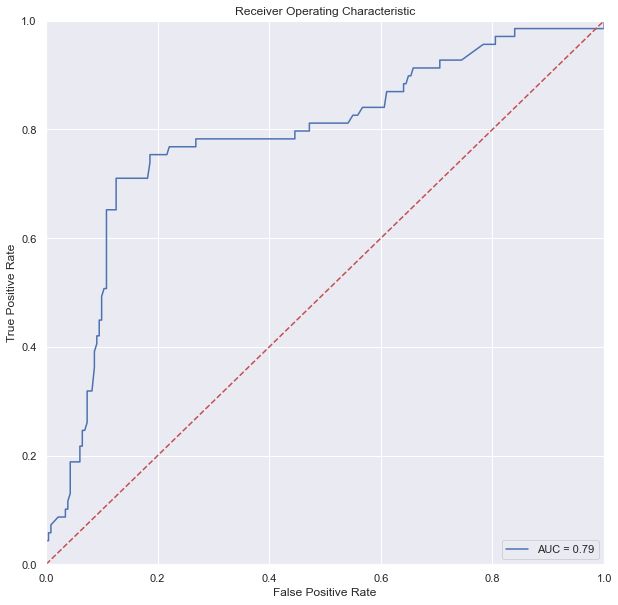

In [23]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_test)
roc_auc = metrics.auc(fpr, tpr)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plot feature importances...


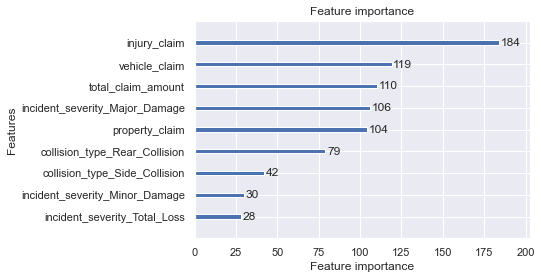

In [24]:
print('Plot feature importances...')
ax = lgb.plot_importance(model, max_num_features=10)
plt.show()